<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_1_Student_Scores_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary :**

1) Importing Libraries                            
2) Loading Dataset                             
3) Data PreProcessing                            
4) EDA (Exploratory Data Analysis)                             
5) Train and Test Split                            
6) Standard Scaler                           
7) Modelling                                     
8) Making Prediction                                   
9) Compare Actual and Predicted Scores                                     
10) Evaluation Metrics                                             

**1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**2) Loading Dataset**

In [2]:
data = pd.read_csv("/content/student_scores.csv")

**3) Data PreProcessing**

1) Top Five Rows of DataSet

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


2) Last Five Rows of DataSet

In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


3) Data types

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

4) Getting Information of DataSet

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


5) Checking Missing Values of DataSet

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

6) Droping Duplicates Values of Dataset

In [8]:
data = data.drop_duplicates()

7) Statistical Measures

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


8) IQR (Inter Quantile Range)

IQR = Q3-Q1

In [10]:
IQR = data.Hours.quantile(0.75) - data.Hours.quantile(0.25)
IQR

4.7

Upper Threshold :                       
Upper Threshold = Q3 + (1.5 * IQR)

In [11]:
Upper_threshold = data.Hours.quantile(0.75) + (1.5 * (IQR))
Upper_threshold

14.450000000000001

Lower Threshold :                            
Lower Threshold = Q1 - (1.5 * IQR)

In [12]:
Lower_threshold = data.Hours.quantile(0.25) - (1.5 * IQR)
Lower_threshold 

-4.3500000000000005

**4) EDA (Exploratory Data Analysis**

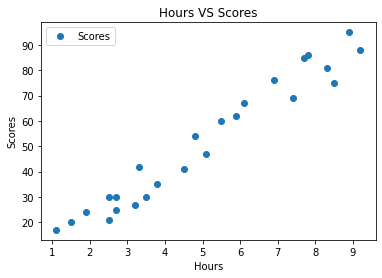

In [13]:
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**5) Train and Test Split**

In [15]:
X = data[["Hours"]]
y = data["Scores"]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

**6) Standard Scaler**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.14804879],
       [-1.51855763],
       [ 0.15650873],
       [-0.83330321],
       [-0.8713729 ],
       [-0.26225786],
       [-1.06172135]])

**7) Modelling**

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

**8) Making Prediction**

y = m*x + c               

y -> Predict Target                                
x -> Features                               
m,c -> Parameters                                

m -> coef_                                
c -> intercept_                                         

In [19]:
lin_reg.coef_

array([9.78618333])

In [20]:
lin_reg.intercept_

2.39583817924818

7 Hours Stuidies                           
y = m * x + c                                  
y = (9.78618333 * 7) + 2.39583817924818                                
y = 70.89912147                                         

In [21]:
lin_reg.predict([[7]])

array([70.89912147])

**9) Compare Actual and Prediction Scores**

In [24]:
y_pred = lin_reg.predict(X_test)
y_pred


array([52.30537315, 17.07511317, 60.13431981, 34.69024316, 33.71162483,
       49.36951815, 28.81853316])

In [25]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred})
df

,Actual,Prediction
1,47,52.305373
5,20,17.075113
11,62,60.134320
13,42,34.690243
2,27,33.711625
21,54,49.369518
9,25,28.818533


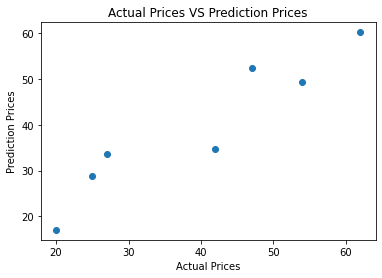

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

**10) Evaluation Metrics**

In [27]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred))

R2-Scores:  0.8855069248710155
